Churn, in a business context, **refers to the rate at which customers or subscribers cease their relationship with a company, often by canceling their subscription or discontinuing the use of a product or service. It is a crucial metric for businesses, especially those in subscription-based industries, as a high churn rate can negatively impact revenue and growth.**

A churn project typically involves efforts to understand, measure, and reduce customer churn. Here's an example of a churn project:

**Churn Analysis and Retention Strategy for a Streaming Service:**

**Objective:**
The streaming service company wants to analyze and reduce the churn rate among its subscribers.

**Steps in the Churn Project:**

1. **Data Collection:**
   Gather relevant data on customer interactions, usage patterns, subscription history, customer support interactions, and any other relevant information.

2. **Churn Definition:**
   Clearly define what constitutes churn for the streaming service. It could be a customer canceling their subscription, not logging in for a certain period, or other specific criteria.

3. **Data Analysis:**
   Use statistical and analytical methods to analyze the data and identify patterns or indicators that precede customer churn. This may involve looking at factors such as usage frequency, customer satisfaction scores, and billing issues.

4. **Segmentation:**
   Segment the customer base based on various characteristics like demographics, usage patterns, and subscription plans. This segmentation helps tailor retention strategies to specific customer groups.

5. **Predictive Modeling:**
   Develop predictive models that can forecast which customers are at a higher risk of churning in the future. Machine learning algorithms can be employed to identify early warning signs of potential churn.

6. **Retention Strategies:**
   Based on the analysis and predictions, devise targeted retention strategies. This could involve personalized promotions, loyalty programs, improved customer service, or addressing specific pain points identified in the analysis.

7. **Implementation:**
   Implement the retention strategies and closely monitor their effectiveness. This may involve A/B testing different approaches to identify the most successful methods.

8. **Continuous Monitoring:**
   Churn is an ongoing concern, so the project should include mechanisms for continuous monitoring of churn rates and the effectiveness of retention strategies. Adjustments and refinements can be made based on ongoing analysis.

By conducting a churn project, businesses aim to proactively retain customers, enhance customer satisfaction, and ultimately maintain or increase their customer base.

In [88]:
import os
import platform
import configparser as cfg
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
# Set the environment variable OMP_NUM_THREADS to 1
os.environ["OMP_NUM_THREADS"] = "1"

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None 

# Suppress UserWarning related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning)


In [8]:
# Define the URL for the dataset
churn_file = r'C:\Users\pedam\github_checkin_code\ml_learning_notebooks\src_data\Telecom_customer_churn.csv'
churn_df = pd.read_csv(churn_file)
churn_df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3137,4567-AKPIA,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.10,4454.25,No
6078,9691-HKOVS,Female,0,Yes,No,55,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,90.15,4916.95,No
5952,4430-YHXGG,Female,0,No,Yes,4,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.45,84.2,No
1324,0031-PVLZI,Female,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35,Yes
2279,5334-AFQJB,Male,1,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.9,No


In [10]:
churn_df.drop('customerID', axis='columns', inplace=True)
churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [12]:
churn_df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
churn_df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [21]:
pd.to_numeric(churn_df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [22]:
churn_df[pd.to_numeric(churn_df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
churn_df_1 = churn_df[churn_df.TotalCharges != ' ']

In [26]:
churn_df_1.shape

(7032, 20)

In [27]:
churn_df_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
pd.to_numeric(churn_df_1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [30]:
 churn_df_1[churn_df_1.Churn  == 'No']

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [32]:
yes_no_columns = [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']

In [48]:
churn_df_1['gender'].replace({'Female': 1, 'Male' : 0}, inplace = True)

In [49]:
for col in yes_no_columns:
    churn_df_1[col].replace({'Yes': 1, 'No' : 0, 
                             'No phone service' : 0, 
                             'No internet service': 0, 
                             'Female' : 1,
                             'Male' : 0 }, 
                            inplace = True)

In [50]:
churn_df_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [51]:
for col in churn_df_1:
    print(f'{col}: {churn_df_1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [58]:
churn_df_dummies = pd.get_dummies(data=churn_df_1, columns=['InternetService','Contract','PaymentMethod'], dtype=int)

In [60]:
churn_df_dummies.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [62]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_df_dummies[columns_to_scale] = scaler.fit_transform(churn_df_dummies[columns_to_scale])

In [64]:
churn_df_dummies.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4531,0,0,1,1,0.112676,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
5816,1,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6365,0,1,1,0,0.084507,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [65]:
for col in churn_df_dummies:
    print(f'{col}: {churn_df_dummies[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [66]:
X = churn_df_dummies.drop('Churn', axis='columns')
y = churn_df_dummies['Churn']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape

(5625, 26)

In [71]:
X_test.shape

(1407, 26)

In [72]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,0.591549,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,1,0,1,0,0.760563,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,0,0,1,1,0.619718,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,1,0,1,1,0.760563,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5284,1,1,0,0,0.056338,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
6741,1,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5931,0,1,1,0,0.169014,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6766,0,0,1,1,0.183099,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [73]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20 , input_shape = (26,) , activation = 'relu'),
    keras.layers.Dense(1 , activation = 'sigmoid'),
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train , epochs = 100)




Epoch 1/100


176/176 [==============================] - 1s 975us/step - loss: 0.5092 - accuracy: 0.7508
Epoch 2/100
176/176 [==============================] - 0s 823us/step - loss: 0.4280 - accuracy: 0.7952
Epoch 3/100
176/176 [==============================] - 0s 760us/step - loss: 0.4201 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 774us/step - loss: 0.4169 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 790us/step - loss: 0.4156 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 840us/step - loss: 0.4134 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 767us/step - loss: 0.4134 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 779us/step - loss: 0.4118 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 0s 794us/step - loss: 0.4113 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 745us/ste

176/176 [==============================] - 0s 708us/step - loss: 0.3889 - accuracy: 0.8155
Epoch 70/100
176/176 [==============================] - 0s 700us/step - loss: 0.3888 - accuracy: 0.8172
Epoch 71/100
176/176 [==============================] - 0s 713us/step - loss: 0.3881 - accuracy: 0.8130
Epoch 72/100
176/176 [==============================] - 0s 707us/step - loss: 0.3882 - accuracy: 0.8165
Epoch 73/100
176/176 [==============================] - 0s 754us/step - loss: 0.3874 - accuracy: 0.8144
Epoch 74/100
176/176 [==============================] - 0s 728us/step - loss: 0.3871 - accuracy: 0.8167
Epoch 75/100
176/176 [==============================] - 0s 704us/step - loss: 0.3871 - accuracy: 0.8158
Epoch 76/100
176/176 [==============================] - 0s 702us/step - loss: 0.3874 - accuracy: 0.8149
Epoch 77/100
176/176 [==============================] - 0s 693us/step - loss: 0.3869 - accuracy: 0.8180
Epoch 78/100
176/176 [==============================] - 0s 694us/step - loss:

In [74]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 899us/step - loss: 0.4421 - accuracy: 0.7868


[0.44207504391670227, 0.7867803573608398]

In [77]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 687us/step


array([[0.01764217],
       [0.05014269],
       [0.6093289 ],
       [0.03348767],
       [0.36743644]], dtype=float32)

In [82]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [80]:
y_pred = []
for element in yp:
    if element > 0.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [83]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

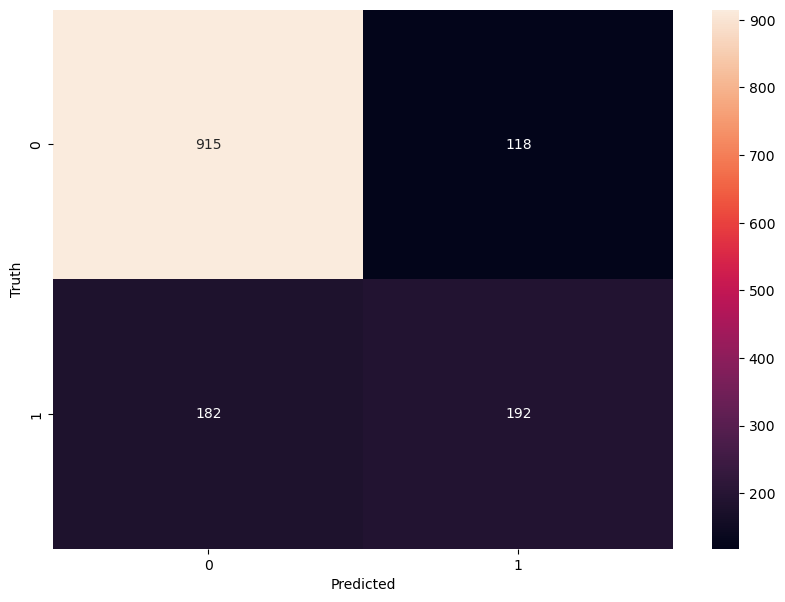

In [89]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
accuracy_m = round((915 + 192) / (915 + 118 +182 + 192),2)
accuracy_m

0.79

precision: 0 th class and 1 th class, 0 th means customers who left the business

    

In [94]:
precision_m_0 = round ( 915 / (915 + 182) , 2)
precision_m_0

0.83

In [96]:
precision_m_1 = round ( 192 / (192 + 118) , 2)
precision_m_1

0.62

In [97]:
recall_m_0 = round( 915 /(915 + 118) , 2)
recall_m_0

0.89

In [98]:
recall_m_1 = round( 192 /(192 + 182) , 2)
recall_m_1

0.51

Take this dataset for bank customer churn prediction:
    https://www.kaggle.com/barelydedicted/bank-customer-churn-modeling
    
    https://www.kaggle.com/code/mathchi/churn-problem-for-bank-customer/input?select=churn.csv
    
    build deeplearning model and predict the churn rate for the bank
    
    